In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import jax.numpy as jnp
from jax import vmap
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import sys 
sys.path.append('../../../')
sys.path.append('../')
from build_scale_solver import build_erg_time_opt_solver
from time_opt_erg_lib.obstacle import Obstacle
import time 


In [2]:
scales = [1.0,10.0,100.0]
trials = 10
logs = {'times' : [],'solutions' : []}
for trial in range(trials):
    logs['times'].append([])
    for scale in scales: 
        args = {
            'N' : 800, 
            'x0' : np.array([0.02, .02])*scale,
            'xf' : np.array([.988, .920])*scale,
            'erg_ub' : 0.001,
            'alpha' : 0.9,
            'wrksp_bnds' : np.array([[0.,1.],[0.,1.]])*scale
        }
        solver = build_erg_time_opt_solver(args, tf_init=10.0)
        start_time = time.time()
        solver.solve(max_iter=20_000, eps=1e-58, alpha=1.000000001)
        end_time = time.time()
        print(end_time-start_time)
        logs['times'][trial].append(end_time-start_time)

I0000 00:00:1704576668.687852       1 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


unsuccessful, tol:  0.002105683
31.52222514152527
unsuccessful, tol:  0.0021429062
32.03315591812134
unsuccessful, tol:  0.080272675
31.750823974609375
unsuccessful, tol:  0.002105683
31.62878680229187
unsuccessful, tol:  0.0021429062
32.142826080322266
unsuccessful, tol:  0.080272675
32.04329013824463
unsuccessful, tol:  0.002105683
31.73786425590515
unsuccessful, tol:  0.0021429062
32.24241781234741
unsuccessful, tol:  0.080272675
32.046651124954224
unsuccessful, tol:  0.002105683
31.798851251602173
unsuccessful, tol:  0.0021429062
32.39306592941284
unsuccessful, tol:  0.080272675
32.026917934417725
unsuccessful, tol:  0.002105683
485.57740807533264


KeyboardInterrupt: 

In [4]:
sol = solver.get_solution()
print(sol['tf'])

37.078617


(0.0, 100.0)

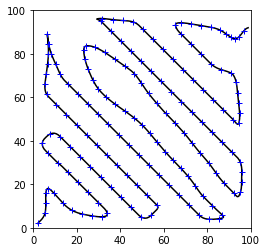

In [5]:
fig, ax = plt.subplots() 

ax.plot(sol['x'][:,0], sol['x'][:,1],'k')
ax.plot(sol['x'][::5,0], sol['x'][::5,1],'b+')

# patches = []
# for ob in obs: 
#     circ = ob.draw()
#     patches.append(circ)

# ax.add_collection(PatchCollection(patches, color='g'))
ax.axis('square')
ax.set_xlim(0,1*scale)
ax.set_ylim(0,1*scale)

# plt.savefig('scaled_search_forest.pdf')
